<a href="https://colab.research.google.com/github/sriramofficial9/deep-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)

In [ ]:
y_train[:3]

array([6, 9, 9], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def sample_image(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

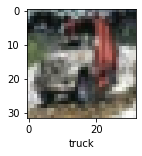

In [ ]:
sample_image(X_train,y_train,146)

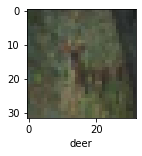

In [ ]:
sample_image(X_train,y_train,10)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 36s 3ms/step - loss: 1.5339 - accuracy: 0.4415
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1406 - accuracy: 0.5973
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9749 - accuracy: 0.6602
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8670 - accuracy: 0.6991
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7805 - accuracy: 0.7284
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7189 - accuracy: 0.7493
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6589 - accuracy: 0.7717
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6119 - accuracy: 0.7866
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5705 - accuracy: 0.8006
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.52

In [ ]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.4961 - accuracy: 0.6946


[2.4960832595825195, 0.694599986076355]

In [ ]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[3.6892597e-02, 3.8645624e-09, 2.2261645e-06, 9.6272629e-01,
        3.1997280e-07, 3.7769962e-04, 2.2572051e-08, 5.0279956e-15,
        5.7896460e-07, 2.0409864e-07],
       [1.0759451e-09, 1.4386845e-12, 2.2065268e-23, 2.9516389e-20,
        1.5783624e-20, 3.8607966e-27, 4.5452356e-31, 1.1146967e-21,
        1.0000000e+00, 2.8146322e-12],
       [1.4572819e-03, 1.0717706e-02, 1.4628917e-09, 6.8006427e-09,
        2.7728183e-07, 3.3444437e-07, 4.6824277e-07, 3.6440344e-08,
        9.8780966e-01, 1.4194908e-05],
       [1.4432932e-02, 8.4047419e-01, 1.4508186e-01, 3.5660989e-07,
        9.5391577e-08, 3.8044071e-14, 2.4068997e-06, 2.8826469e-06,
        1.3015380e-08, 5.3093918e-06],
       [2.0342782e-20, 1.4971500e-24, 1.0743622e-08, 6.5897439e-12,
        9.9999964e-01, 1.8004818e-15, 4.0036176e-07, 6.3005978e-30,
        9.4030978e-22, 6.8859476e-27]], dtype=float32)

In [ ]:

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 1, 4]

In [ ]:

y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

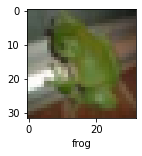

In [ ]:
sample_image(X_test,y_test,7)

In [ ]:

classes[y_classes[7]]

'bird'

In [ ]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.87      0.80      0.83      1000
           2       0.52      0.67      0.58      1000
           3       0.52      0.57      0.55      1000
           4       0.63      0.66      0.64      1000
           5       0.69      0.51      0.59      1000
           6       0.73      0.78      0.76      1000
           7       0.80      0.63      0.71      1000
           8       0.79      0.81      0.80      1000
           9       0.81      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
accuracy_score(y_test, y_pred_classes)

[[778  14  62  19  20   4  18   6  56  23]
 [ 28 801  18   6   4   7  13   7  34  82]
 [ 58   5 666  64  86  32  53  18  15   3]
 [ 27   3 118 572  61  84  74  32  17  12]
 [ 30   2 121  69 660  17  56  30  12   3]
 [ 15   1 107 209  51 512  36  51  14   4]
 [ 12   4  66  61  45  11 781   3  12   5]
 [ 24   5  68  62 112  60  14 633   9  13]
 [ 85  20  24  18   7   2   4   1 814  25]
 [ 59  64  34  15   8  12  17   9  53 729]]


0.6946

In [ ]:
model.save('my_model.hdf5') 